# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#tips = pd.read_csv("C:/Users/admin/IBM_Training/Training/Data Visualization/Tips.csv")
tips=sns.load_dataset("tips")
sns.load_dataset("flights")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
stores=pd.read_csv("C:\\Users\\Karan Mehta\\Desktop\\Data\\stores.csv")

stores=stores.iloc[:,1:]
stores.dropna(how="any",axis=0,inplace=True)
stores.head()

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,...,OnlinePresence,Tenure,StoreSegment,Range,Exp,Exp2,Ment.TotalSales,Ment.Total_Customers,New,Square
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,...,1,4,4,Medium,25600.0,12100,5.428835,4.791420,4096000.0,12100
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,...,1,4,4,Medium,25600.0,12100,5.428835,4.791420,4096000.0,12100
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,...,1,4,1,Medium,11664.0,8649,4.762203,4.530655,1259712.0,8649
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,...,0,3,1,Medium,66564.0,12100,6.366097,4.791420,17173512.0,12100
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,...,0,3,2,Medium,129600.0,30625,7.113787,5.593445,46656000.0,30625


In [ ]:
stores.head()
stores["Location"].value_counts()

In [ ]:
#plt.figure(figsize=(12,12))
#sns.barplot(x="Location",y="TotalSales",data=stores);
#tips.head()
sns.barplot("smoker","total_bill",data=tips,estimator=np.median);

In [ ]:
tips[tips["smoker"]=="No"]["total_bill"].sum()
#1930

## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

In [ ]:
sns.barplot(x='time',y='tip',data=tips);

In [ ]:
import numpy as np
tip=sns.load_dataset("tips")
#tip

# Execute all the below codes one by one or one at a time

You can change the estimator object to your own function, that converts a vector to a scalar:

In [ ]:
#sns.barplot(x='smoker',y='total_bill',data=tips,estimator=np.sum);
sns.barplot(x='day',y='total_bill',data=tips,estimator=np.min);
#sns.barplot("Location","TotalSales",data=stores,estimator=np.std)
#tips.groupby("smoker").sum()["total_bill"]

In [ ]:
sns.barplot(x="sex",y="total_bill",data=tips,estimator=np.mean)

In [ ]:
sns.barplot(x="sex",y="total_bill",data=tips,estimator=np.sum)
#sns.barplot(x="smoker",y="total_bill",data=tips,estimator=np.mean)

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

In [ ]:
sns.countplot(x='smoker',data=tips)
#sns.countplot(x='sex',data=tips)

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

In [ ]:
#palette="husl","rainbow","coolwarm"
sns.boxplot(x="day", y="total_bill", data=tips,palette="rainbow");
#sns.boxplot(x="Location",y="TotalSales",data=stores,palette="rainbow")

In [ ]:
plt.boxplot(stores["TotalSales"],showmeans=True);
#print(stores["TotalSales"].mean())
#stores["TotalSales"].median()

In [ ]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')


In [ ]:
sns.boxplot(x="day", y="total_bill",hue="smoker",data=tips, palette="husl");
#sns.boxplot(x="time", y="total_bill", hue="sex",data=tips, palette="husl");
#stores.head()
#sns.boxplot(x="Location",y="TotalSales",data=stores,hue="StoreType");



### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')
#sns.violinplot(x="StoreType",y="TotalSales",data=stores)

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='smoker',palette='Set1')
#sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=False)

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True);

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex')

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',split=True)

## SwarmPlot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

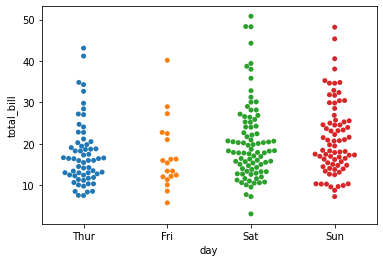

In [4]:
sns.swarmplot(x="day", y="total_bill", data=tips)

C:\Users\Karan Mehta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\Karan Mehta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

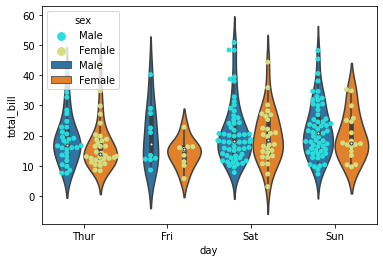

In [5]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="rainbow", split=True)
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex')

### Combining Categorical Plots

<AxesSubplot:xlabel='day', ylabel='tip'>

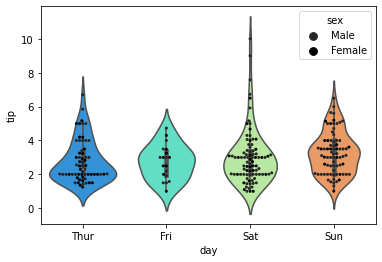

In [10]:
sns.violinplot(x="day", y="tip",data=tips,palette='rainbow')
sns.swarmplot(x="day", y="tip",hue="sex", data=tips,color='black',size=3)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

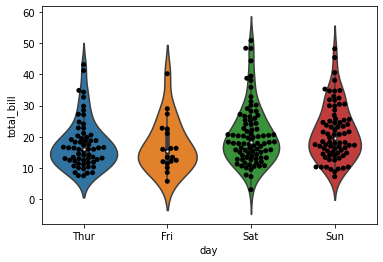

In [11]:
sns.swarmplot(x="day", y="total_bill",data=tips,color="black")
sns.violinplot(x="day",y="total_bill",data=tips)

## factorplot

factorplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

In [ ]:
sns.factorplot(x='sex',y='total_bill',data=tips,kind="boxen")
#sns.factorplot(x='sex',y='total_bill',data=tips,kind="bar");
#Kind = strip,bar,box,violin, swarm, boxen.

# Great Job!